# Figure of complex source from Neuron

Make a figure of the features learnt

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['text.usetex'] = True


import pink_utils as pu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
som = pu.som('../Experiment/Experiment_F3W2_95_5/Results/F3W2_95_5/F3W2S_95_5_6_19.bin')

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


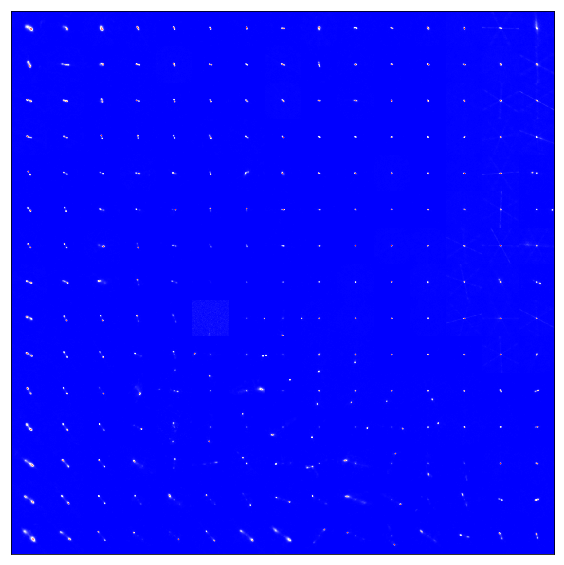

In [3]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

ax.imshow(som.get_som(), cmap='bwr')
pu.no_ticks(ax)

fig.show()

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


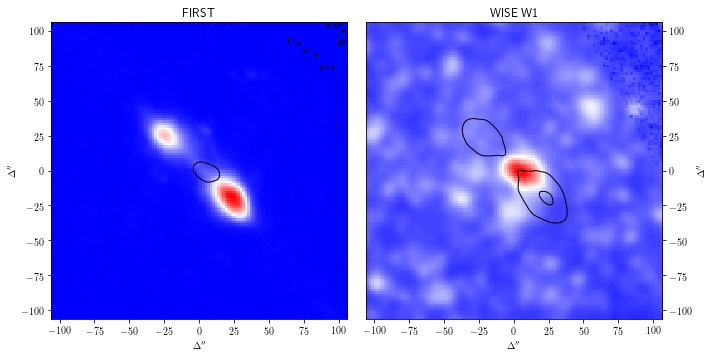

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))

f_n = som.get_neuron(14,0)
w_n = som.get_neuron(14,0, channel=1)

PIX=1.8
OFF_X = f_n.shape[0]//2
OFF_Y = f_n.shape[1]//2
extent = [-OFF_X*PIX, OFF_X*PIX, -OFF_Y*PIX,OFF_Y*PIX]

ax1.imshow(f_n, cmap='bwr', extent=extent)
ax1.set(xlabel="$\Delta''$", ylabel="$\Delta''$", title='FIRST')
ax1.contour(w_n,origin='image', extent=extent, levels=np.arange(5*w_n.std(), w_n.max(), 8*w_n.std()),
                 linewidths=1, colors='black', cmap=None)

ax2.imshow(w_n, cmap='bwr', extent=extent)
ax2.set(xlabel="$\Delta''$", ylabel="$\Delta''$", title='WISE W1')
ax2.contour(f_n,origin='image', extent=extent, levels=np.arange(2*f_n.std(), f_n.max(), 8*f_n.std()),
                 linewidths=1, colors='black', cmap=None)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')

fig.tight_layout()
fig.show()

In [5]:
def slice_region(n, center_size):
    size = n.shape
    return n[int(size[0]/2-size[0]/center_size):int(size[0]/2+size[0]/center_size), 
              int(size[1]/2-size[1]/center_size):int(size[1]/2+size[1]/center_size)]
    
def plt_neuron(axes, som, pos, top=False, bottom=False, inner=None, ant=None, sqrt=False,
               contour=True):
    '''Helper to make up a consistent figure
    '''
    x, y = pos
    f_n = som.get_neuron(x,y)
    w_n = som.get_neuron(x,y, channel=1)

    if inner is not None:
        f_n = slice_region(f_n, inner)
        w_n = slice_region(w_n, inner)

    if sqrt is True:
        f_n = np.sqrt(f_n)
        _n = np.sqrt(w_n)
        
    PIX=1.8
    OFF_X = f_n.shape[0]//2
    OFF_Y = f_n.shape[1]//2
    extent = [-OFF_X*PIX, OFF_X*PIX, -OFF_Y*PIX,OFF_Y*PIX]

    ax1, ax2 = axes
    
    ax1.imshow(f_n, cmap='bwr', extent=extent)
    ax2.imshow(w_n, cmap='bwr', extent=extent)
    
    if contour:
        ax1.contour(w_n,origin='image', extent=extent, levels=np.arange(5*w_n.std()+w_n.mean(), w_n.max(), 5*w_n.std()),
                         linewidths=1, colors='black', cmap=None, alpha=0.5)
        ax2.contour(f_n,origin='image', extent=extent, levels=np.arange(5*f_n.std() + f_n.mean(), f_n.max(), 5*f_n.std()),
                         linewidths=1, colors='black', cmap=None, alpha=0.5)
    
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right')
    
    ax1.grid(color='white', linestyle='--', linewidth=2, alpha=0.5)
    ax2.grid(color='white', linestyle='--', linewidth=2, alpha=0.5)

    if ant is not None:
        bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
        ax1.annotate(f'{ant}', xy=(0.05,0.92), xycoords='axes fraction', bbox=bbox_props)
#         ax2.annotate(f'{ant}', xy=(0.8,0.05), xycoords='axes fraction', bbox=bbox_props)

    
    if top:
        ax1.set(ylabel="$\Delta''$", title='FIRST')
        ax2.set(ylabel="$\Delta''$", title='WISE W1')
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])

    elif bottom:
        ax1.set(ylabel="$\Delta''$", xlabel="$\Delta''$")
        ax2.set(ylabel="$\Delta''$", xlabel="$\Delta''$")

    else:
        ax1.set(ylabel="$\Delta''$")
        ax2.set(ylabel="$\Delta''$")
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])

/Users/gal16b/miniconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


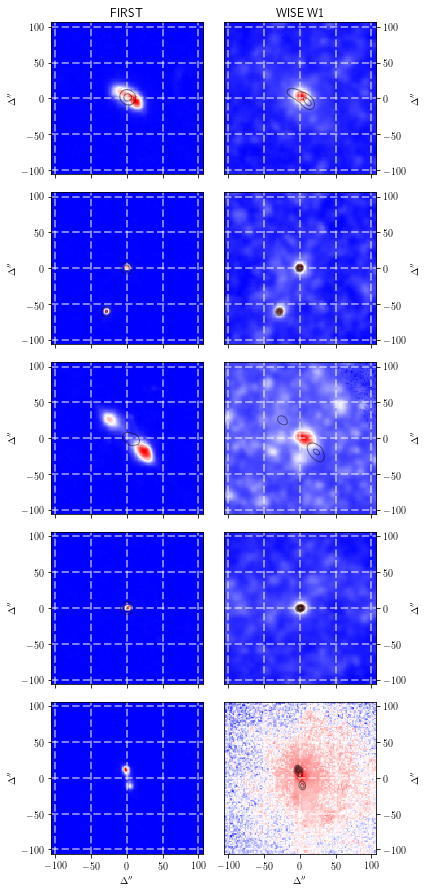

In [6]:
positions = [(0,0), (10,10), (14,0), (7, 7), (14, 14)]
fig, axes = plt.subplots(len(positions),2, figsize=(6, len(positions)*2.5))
for c, pos in enumerate(positions):
    top = c == 0
    bottom = c == (len(positions)-1)
    plt_neuron(axes[c], som, pos, top=top, bottom=bottom)

# fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.tight_layout()
# fig.show()
fig.savefig('Images/Figure_Example_Neurons.pdf')

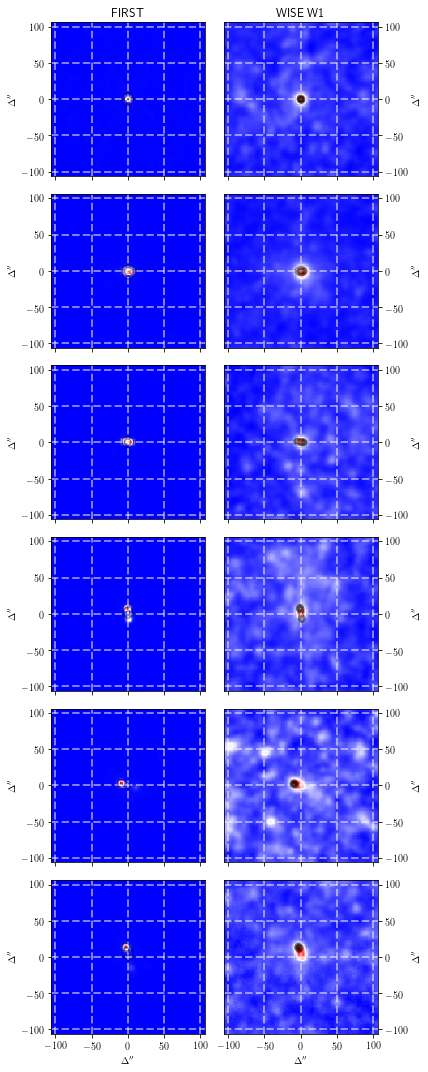

In [7]:
positions = [(8,9), (1,9), (2,8),  (3,3), (5,3), (7,3)]
# positions = [i[::-1] for i in positions]
fig, axes = plt.subplots(len(positions),2, figsize=(6, len(positions)*2.5))
for c, pos in enumerate(positions):
    top = c == 0
    bottom = c == (len(positions)-1)
    plt_neuron(axes[c], som, pos, top=top, bottom=bottom)

# fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.tight_layout()
fig.savefig('Images/Figure_Example_Neurons.pdf')

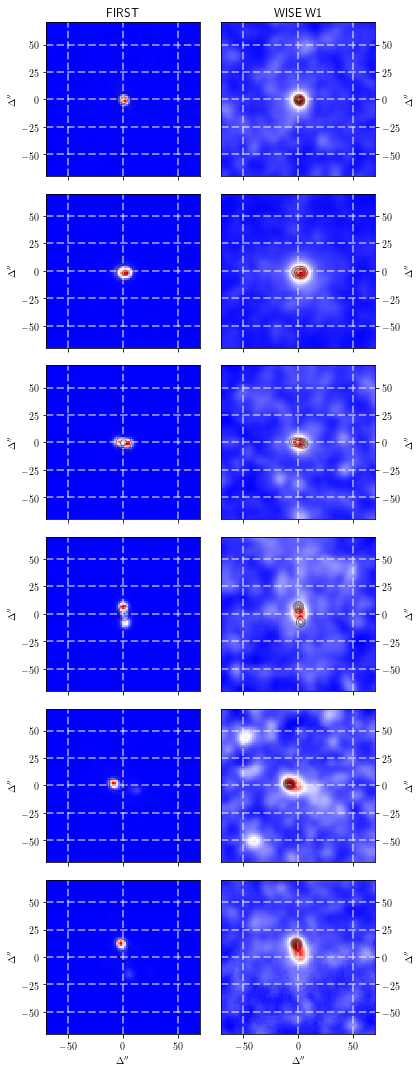

In [8]:
positions = [(8,9), (1,9), (2,8),  (3,3), (5,3), (7,3)]
# positions = [i[::-1] for i in positions]
fig, axes = plt.subplots(len(positions),2, figsize=(6, len(positions)*2.5))
for c, pos in enumerate(positions):
    top = c == 0
    bottom = c == (len(positions)-1)
    plt_neuron(axes[c], som, pos, top=top, bottom=bottom, inner=3)

# fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.tight_layout()
# fig.show()
fig.savefig('Images/Figure_Example_Neurons_Zoom.pdf')

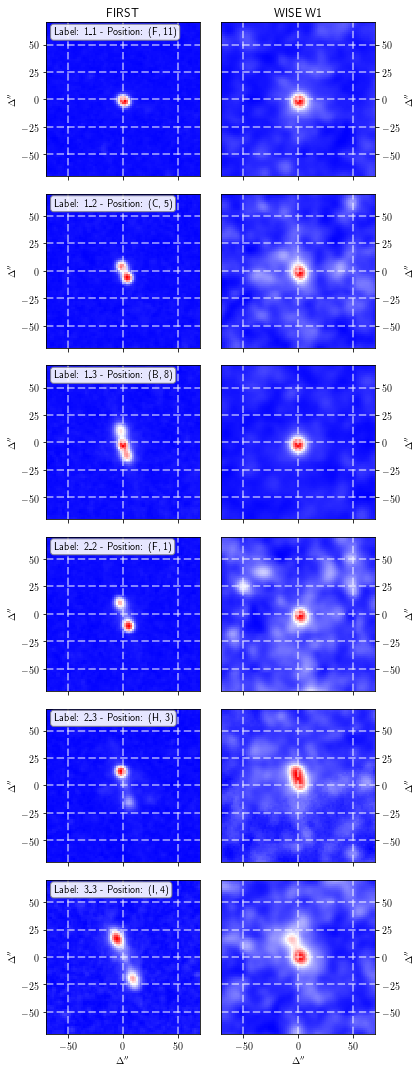

In [9]:
# Taken from the Figure_Average_Heatmaps.ipynb notbook
# (array([5]), array([11]))
# (array([2]), array([5]))
# (array([1]), array([8]))
# (array([5]), array([1]))
# (array([7]), array([3]))
# (array([8]), array([4]))

positions = [(5,11), (2,5), (1,8),  (5,1), (7,3), (8,4)]
label = ['1\_1','1\_2','1\_3','2\_2','2\_3','3\_3']
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# positions = [i[::-1] for i in positions]
fig, axes = plt.subplots(len(positions),2, figsize=(6, len(positions)*2.5))
for c, pos in enumerate(positions):
    ant_label = f'Label: {label[c]} - Position: ({letters[pos[0]]}, {pos[1]})'
    top = c == 0
    bottom = c == (len(positions)-1)
    plt_neuron(axes[c], som, pos, top=top, bottom=bottom, inner=3, ant=ant_label, 
               contour=False, sqrt=True)

# fig.subplots_adjust(wspace=0.1, hspace=0.1)
fig.tight_layout()
# fig.show()
fig.savefig('Images/Figure_Example_Neurons_Zoom.pdf')

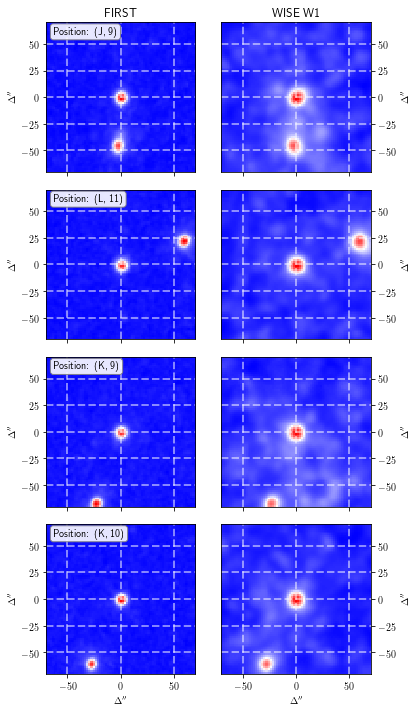

In [16]:
positions = [(9,9), (11,11), (10,9), (10,10)]
label = ['1\_1','1\_2','1\_3','2\_2','2\_3','3\_3']
letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

# positions = [i[::-1] for i in positions]
fig, axes = plt.subplots(len(positions),2, figsize=(6, len(positions)*2.5))
for c, pos in enumerate(positions):
    ant_label = f'Position: ({letters[pos[0]]}, {pos[1]})'
    top = c == 0
    bottom = c == (len(positions)-1)
    plt_neuron(axes[c], som, pos, top=top, bottom=bottom, inner=3, ant=ant_label, 
               contour=False, sqrt=True)
fig.tight_layout()
fig.savefig('Images/Figure_Different_Hosts.pdf')